In [1]:
import fastbook
fastbook.setup_book()

/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from fastai.data.external import untar_data,URLs
from fastai.data.transforms import get_image_files

In [4]:
path = Path("stage2/") #started typing and did autocomplete

In [5]:
files = get_image_files(path/'aluminium can')

In [6]:
parent_label(files[0]) #cardboard

'aluminium can'

In [7]:
##Dataloaders??

In [8]:
import PIL

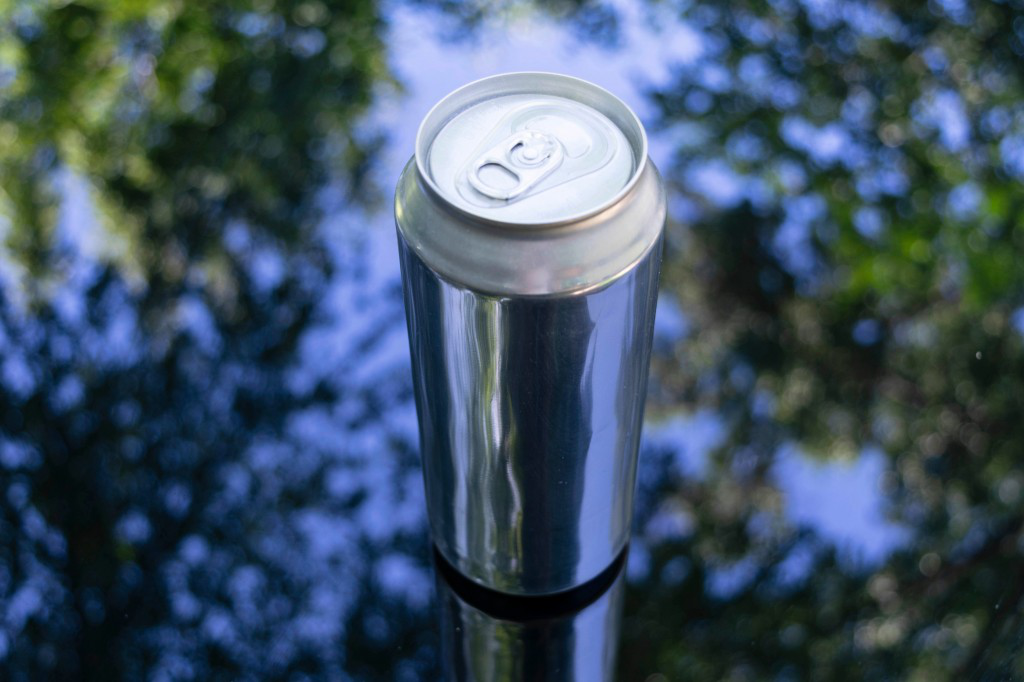

In [9]:
img = PIL.Image.open(files[0])
img

In [10]:
device = {'cuda:0' if torch.cuda.is_available() else 'cpu'}
device

{'cuda:0'}

In [11]:
torch.cuda.is_available()

True

In [14]:
trash_types = 'HDPE container', 'PET plastic bottle', 'aluminium can', 'cardboard', 'glass', 'paper2D', 'paper3D', 'steel and tin cans'

In [15]:
if not path.exists():
    print("No path")
    path.mkdir() #existed
#Made the empty folders below
for t in trash_types:
    dest = (path/t)
    dest.mkdir(exist_ok=True) 


In [16]:
fns = get_image_files(path)
fns

(#2809) [Path('stage2/paper2D/paper587.jpg'),Path('stage2/paper2D/paper52.jpg'),Path('stage2/paper2D/paper211.jpg'),Path('stage2/paper2D/paper120.jpg'),Path('stage2/paper2D/paper395.jpg'),Path('stage2/paper2D/paper438.jpg'),Path('stage2/paper2D/paper221.jpg'),Path('stage2/paper2D/paper392.jpg'),Path('stage2/paper2D/paper220.jpg'),Path('stage2/paper2D/paper350.jpg')...]

In [17]:
failed = verify_images(fns)

In [18]:
failed

(#0) []

# QUICK MODEL (Resnet18)

In [18]:
trash = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items =get_image_files,
        splitter = RandomSplitter(valid_pct=0.2, seed=42),
        get_y = parent_label, #get label from parent folder
        item_tfms = RandomResizedCrop(224, min_scale=0.5)
)

In [18]:
dls = trash.dataloaders(path, device='cuda:0')
#no Could not do one pass in your dataloader, there is something wrong in it
#after changed from device = device to device = 'cuda:0'

In [19]:
dls.one_batch()

(TensorImage([[[[0.6549, 0.6549, 0.6549,  ..., 0.5804, 0.5804, 0.5804],
           [0.6549, 0.6549, 0.6549,  ..., 0.5804, 0.5804, 0.5804],
           [0.6549, 0.6549, 0.6549,  ..., 0.5843, 0.5843, 0.5804],
           ...,
           [0.7020, 0.7020, 0.7020,  ..., 0.6235, 0.6235, 0.6235],
           [0.7020, 0.7020, 0.7020,  ..., 0.6235, 0.6235, 0.6235],
           [0.7020, 0.7020, 0.7020,  ..., 0.6235, 0.6235, 0.6275]],
 
          [[0.6196, 0.6196, 0.6196,  ..., 0.5333, 0.5333, 0.5333],
           [0.6196, 0.6196, 0.6196,  ..., 0.5333, 0.5333, 0.5333],
           [0.6196, 0.6196, 0.6196,  ..., 0.5373, 0.5373, 0.5333],
           ...,
           [0.6549, 0.6549, 0.6549,  ..., 0.5765, 0.5765, 0.5765],
           [0.6549, 0.6549, 0.6549,  ..., 0.5765, 0.5765, 0.5765],
           [0.6549, 0.6549, 0.6549,  ..., 0.5725, 0.5725, 0.5765]],
 
          [[0.5608, 0.5608, 0.5608,  ..., 0.4706, 0.4706, 0.4706],
           [0.5608, 0.5608, 0.5608,  ..., 0.4706, 0.4706, 0.4706],
           [0.5608,

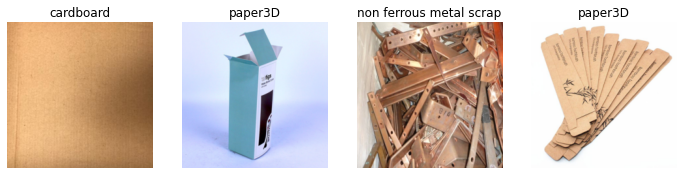

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

epoch 	train_loss 	valid_loss 	error_rate 	time
0 	1.811117 	0.673830 	0.215842 	01:14
epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.802700 	0.504568 	0.160396 	01:15
1 	0.625307 	0.409253 	0.142574 	01:17
2 	0.480807 	0.398619 	0.146535 	01:17
3 	0.372067 	0.381660 	0.122772 	01:16

#### With RandomResizedCrop

In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [22]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.749277,0.588716,0.214912,00:17


/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.722820,0.464203,0.172515,00:19
1,0.583795,0.445262,0.166667,00:19
2,0.493828,0.421100,0.156433,00:19
3,0.403624,0.451998,0.156433,00:19
4,0.334291,0.420553,0.156433,00:18
5,0.288881,0.426398,0.152047,00:18
6,0.251857,0.415084,0.150585,00:19
7,0.218177,0.381703,0.149123,00:19
8,0.192287,0.431926,0.152047,00:19
9,0.176368,0.460363,0.149123,00:19


/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaco

/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaco

### WIthout random resized cropm

In [40]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [41]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.934334,0.854933,0.267380,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.840298,0.709658,0.229947,00:12
1,0.698668,0.639729,0.216578,00:12
2,0.564973,0.631592,0.203209,00:12
3,0.449593,0.557936,0.179144,00:12
4,0.349996,0.584081,0.160428,00:13
5,0.266550,0.553377,0.147059,00:13
6,0.199405,0.605105,0.152406,00:12
7,0.150620,0.617646,0.152406,00:12
8,0.113382,0.571016,0.136364,00:13
9,0.087667,0.546766,0.136364,00:13


 epoch 	train_loss 	valid_loss 	error_rate 	time
0 	1.850513 	0.701962 	0.190099 	01:15
epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.843094 	0.519648 	0.158416 	01:16
1 	0.722866 	0.470383 	0.158416 	01:17
2 	0.559567 	0.385397 	0.124752 	01:18
3 	0.430692 	0.362533 	0.112871 	01:19
4 	0.337006 	0.360453 	0.112871 	01:18
5 	0.252257 	0.313348 	0.085149 	01:19
6 	0.194242 	0.357489 	0.100990 	01:20
7 	0.146675 	0.308736 	0.089109 	01:19
8 	0.122154 	0.286139 	0.085149 	01:22
9 	0.112551 	0.296070 	0.091089 	01:37

#NOTES:
With recyclables (incl. ferrous and nonferrous), get high 18% loss.  Here seem to get 12.03 with 16 epochs.  Try random resized crop

In [ ]:
IMAGES IN recyc_no_scrap_or_glass: 50 of each non-glass and non-ferrous/ferrous cat + 100 of trash

# Resnet34

In [19]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items =get_image_files,
        splitter = RandomSplitter(valid_pct=0.2, seed=42),
        get_y = parent_label, #get label from parent folder
        item_tfms = RandomResizedCrop(224, min_scale=0.5)
).dataloaders(path, device='cuda:0')


In [20]:
save_model = SaveModelCallback(monitor='error_rate', comp=None, min_delta=0.0, fname='stage2', every_epoch=False, at_end=False, with_opt=False, reset_on_fit=True)
cbs = [TrainEvalCallback(),ProgressCallback(),save_model]
# SaveModelCallback(every_epoch=True)]
learn = vision_learner(dls, resnet34, metrics=error_rate, cbs=cbs)

In [21]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,1.321981,0.396563,0.126560,00:20


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 0 with error_rate value: 0.12655971944332123.


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.506509,0.297761,0.103387,00:25
1,0.358454,0.234052,0.071301,00:25
2,0.261434,0.239608,0.078431,00:26
3,0.193101,0.265825,0.081996,00:26
4,0.148573,0.223900,0.055258,00:26
5,0.120159,0.361017,0.080214,00:26
6,0.095748,0.264616,0.060606,00:26
7,0.081536,0.295229,0.080214,00:26
8,0.074097,0.280912,0.073084,00:26
9,0.066519,0.220163,0.046346,00:26


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 0 with error_rate value: 0.10338681191205978.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 1 with error_rate value: 0.07130124419927597.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 4 with error_rate value: 0.05525847151875496.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Better model found at epoch 9 with error_rate value: 0.04634581133723259.


/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/mambaforge/envs/fastClean/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 epoch 	train_loss 	valid_loss 	error_rate 	time
0 	1.680363 	0.688131 	0.227723 	01:21
epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.816186 	0.587929 	0.203960 	01:25
1 	0.665894 	0.488878 	0.142574 	01:25
2 	0.531409 	0.424168 	0.134653 	01:25
3 	0.408662 	0.435908 	0.132673 	01:25
4 	0.313750 	0.352179 	0.104950 	01:27
5 	0.246948 	0.336746 	0.104950 	01:26
6 	0.191810 	0.341128 	0.099010 	01:28   #saved to model_6.pth, learn how to load it
7 	0.158596 	0.336245 	0.104950 	01:26


 epoch 	train_loss 	valid_loss 	error_rate 	time
0 	1.760472 	0.639008 	0.223762 	01:24
epoch 	train_loss 	valid_loss 	error_rate 	time
0 	0.848104 	0.542473 	0.196040 	01:28
1 	0.684445 	0.447180 	0.154455 	01:27
2 	0.573362 	0.472952 	0.144554 	01:26
3 	0.460479 	0.350205 	0.099010 	01:29
4 	0.343618 	0.357197 	0.110891 	01:29
5 	0.264540 	0.375858 	0.124752 	01:26
6 	0.201217 	0.329097 	0.102970 	01:27
7 	0.157736 	0.308786 	0.091089 	01:26
8 	0.134358 	0.308325 	0.095050 	01:28
9 	0.115339 	0.309205 	0.093069 	01:27

In [22]:
learn.export('stage2.pkl')

### Clean up the data an unlink ambiguous/incorrectly labeled images

/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


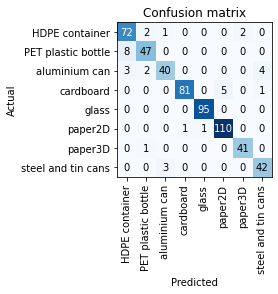

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
#CONCLUSION: MODEL UNDERSTANDABLY GETS CONFUSED ABOUT FERROUS/NONFERROUS METAL SCRAPS. THESE WERE NOT IN Cutlip's description->
#may want to remove them for now and stick to Cutlip's story
#ADD GLASS TO THE recyclables CATEGORY FOR stage 1

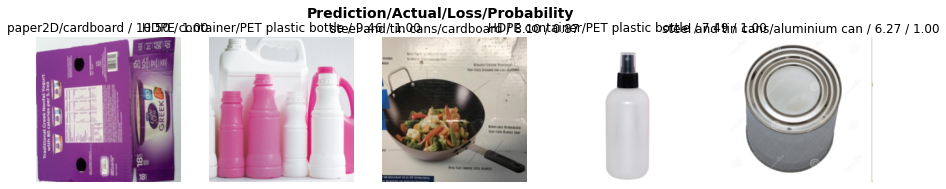

In [33]:
interp.plot_top_losses(5, nrows=1)

In [34]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/dpv/anaconda3/envs/fastenv/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [1]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [38]:
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [23]:
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('stage2.pkl'),Path('stage1.pkl')]

In [24]:
#For practice, loading from pickle file
learn_inf = load_learner(path/'stage2.pkl')

In [26]:
learn_inf.predict(path/'stage2ex1.jpeg')

('HDPE container',
 TensorBase(0),
 TensorBase([9.9711e-01, 3.0561e-04, 6.9367e-05, 2.7618e-05, 9.3426e-06, 9.0418e-06, 6.1306e-05, 2.4043e-03]))

In [27]:
learn_inf.predict(path/'stage2ex2.jpeg')

('steel and tin cans',
 TensorBase(7),
 TensorBase([6.9032e-05, 1.2304e-04, 8.5112e-03, 9.8813e-06, 1.8775e-05, 1.1024e-06, 2.4928e-06, 9.9126e-01]))

In [28]:
learn_inf.predict(path/'stage2ex3.jpeg')

('PET plastic bottle',
 TensorBase(1),
 TensorBase([1.3349e-09, 1.0000e+00, 5.1434e-12, 4.1432e-11, 5.7863e-09, 1.5601e-15, 3.7673e-10, 1.8813e-12]))

In [116]:
#learn_inf.predict(path/'image2.png')

('plastic',
 TensorBase(4),
 TensorBase([4.4445e-04, 3.8089e-04, 4.2420e-01, 1.8869e-03, 5.5797e-01, 1.5113e-02]))

In [27]:
learn_inf.dls.vocab

['HDPE container', 'PET plastic bottle', 'aluminium can', 'cardboard', 'glass', 'paper2D', 'paper3D', 'steel and tin cans']

In [38]:
open_image(files[0]).shape

torch.Size([3, 224, 224])